# Тестовое задание для стажеров

Отчет по исследованию: «Покупательские привычки и поведение покупателей
Wildberries»

Основная информация:
Аудитория, кто проходил опрос

Активные покупатели Wildberries, совершившие
покупки за последний месяц

Данные по ссылке Данные для анализа «Покупательские привычки и

поведение покупателей Wildberries»

## Структура файла

15 вопросов, 3 типа ответов:
●  одиночный выбор (9)
●  множественный выбор (5)
●  открытый текст (1)

Цели ● Зафиксировать покупательские паттерны и
особенности покупательского поведения.
● Понять, как часто и где покупают: онлайн или
офлайн
● Определить, какие онлайн площадки
используют, какие товары покупают онлайн.
● Оценить удовлетворенность онлайн-опытом,
выявить проблемы, с которыми сталкиваются
покупатели.

## Задачи

1. Опишите аудиторию (пол, возраст, частота
покупок).
2. Проанализируйте полученные данные.
3. Проанализируйте открытый вопрос «Каких
сервисов/функций не хватает?».

## Формат отчета

1. Вводный слайд: название исследования, цель,
дата, автор.
2. Методология: кого опрашивали, объем
выборки, период полевых работ, структура
анкеты.
3. Основные выводы по результатам всего
опроса.
4. Детализация результатов (анализ): графики или
таблицы (по собственному усмотрению)
5. Профиль респондентов

Модель данных:

Вопрос	Тип вопроса

Где вы чаще всего совершаете покупки? (Одиночный выбор)	Одиночный выбор

Как часто вы совершаете покупки на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)	Одиночный выбор

На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)	Множественный выбор

На какой онлайн-площадке вы покупаете чаще всего? (Одиночный выбор)	Одиночный выбор

Что для вас наиболее важно при выборе площадки для онлайн-покупок? (Множественный выбор)	Множественный выбор

Какие товары вы чаще всего покупаете онлайн? (Множественный выбор)	Множественный выбор

Как вы оцениваете ассортимент товаров на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)	Одиночный выбор

Считаете ли вы покупки на онлайн-площадках (маркетплейсы, интернет-магазины и прочее) более доступными по сравнению с обычными магазинами? (Одиночный выбор)	Одиночный выбор

Какие способы доставки для вас удобнее при покупках на онлайн-площадках (маркетплейсы, интернет-магазины и пр.)? (Множественный выбор)	Множественный выбор

Насколько вы в целом довольны своим опытом покупок на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)	Одиночный выбор

Сталкивались ли вы с проблемами при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)	Одиночный выбор

С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)	Множественный выбор

Каких сервисов или функций вам не хватает при онлайн‑покупках, чтобы сделать их удобнее? (Свободный ответ)	Открытый текстовый ответ

И в заключение несколько вопросов о вас. Укажите ваш пол. (Одиночный выбор)	Одиночный выбор

Сколько вам полных лет? (Одиночный выбор)	Одиночный выбор

Imports


In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE



sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /home/ivzarru/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ivzarru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<Figure size 1000x600 with 0 Axes>

Откроем витрину

In [81]:
df = pd.read_excel('../data/data.xlsx')
df.head()

,ID ответа,Дата ответа,Где вы чаще всего совершаете покупки? (Одиночный выбор),"Как часто вы совершаете покупки на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Wildberries","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Amazon","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_AliExpress","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Ozon","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_eBay","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Яндекс Маркет",...,"С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Товар не соответствовал описанию или фото","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Плохое качество товара","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Пришёл не тот товар / не весь заказ","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Сложности с возвратом","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Поддержка не отвечала","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Ошибки при оплате","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Поврежденная упаковка или товар","Каких сервисов или функций вам не хватает при онлайн‑покупках, чтобы сделать их удобнее? (Свободный ответ)",И в заключение несколько вопросов о вас. Укажите ваш пол. (Одиночный выбор),Сколько вам полных лет? (Одиночный выбор)
0,117936310,2025-05-25 16:16:00,Чаще онлайн,2-3 раза в месяц,Wildberries,Amazon,AliExpress,Ozon,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Затрудняюсь ответить,Женский,25-34
1,117931738,2025-05-25 16:14:00,"И онлайн, и офлайн",2-3 раза в месяц,Wildberries,NaN,AliExpress,Ozon,NaN,Яндекс Маркет,...,NaN,NaN,NaN,Сложности с возвратом,NaN,NaN,NaN,Затрудняюсь ответить,Женский,18-24
2,117926583,2025-05-25 15:29:00,"И онлайн, и офлайн",2-3 раза в месяц,Wildberries,Amazon,AliExpress,Ozon,eBay,Яндекс Маркет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Затрудняюсь ответить,Женский,45-54
3,117925941,2025-05-25 14:40:00,"И онлайн, и офлайн",Раз в месяц или реже,Wildberries,NaN,AliExpress,Ozon,NaN,NaN,...,Товар не соответствовал описанию или фото,Плохое качество товара,Пришёл не тот товар / не весь заказ,NaN,NaN,NaN,NaN,Затрудняюсь ответить,Мужской,45-54
4,117920167,2025-05-25 13:56:00,"И онлайн, и офлайн",2-3 раза в месяц,Wildberries,NaN,AliExpress,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Затрудняюсь ответить,Мужской,35-44


Заметим, что уже был выполнен препроцессинг и мы можем преобразовать все значения множественных выборов в бинарные

Заполним NaN нулями, а соответствующие значения во множественном выборе единицами

Но сначала выделим все множественные колонки, одиночные колонки(для будущего препроцессинга)

In [82]:
multiple_columns = []
for col in df.columns:
    if 'Множественный выбор' in col:
        multiple_columns.append(col)

single_columns = []
for col in df.columns:
    if 'Одиночный выбор' in col:
        single_columns.append(col)
print(multiple_columns)
print(single_columns)

['На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Wildberries', 'На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Amazon', 'На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_AliExpress', 'На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Ozon', 'На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_eBay', 'На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Яндекс Маркет', 'На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Taobao', 'На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выб

 Заменим на бинарные(т.к. информация о выборе уже содержится в названии колонки) все значения из колонок множественного выбора. 1 - не был выбран. 2 - был

In [83]:
for col in multiple_columns:
    df[col] = df[col].apply(lambda x: 0 if pd.isna(x) else 1)
df.head()

,ID ответа,Дата ответа,Где вы чаще всего совершаете покупки? (Одиночный выбор),"Как часто вы совершаете покупки на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Wildberries","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Amazon","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_AliExpress","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Ozon","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_eBay","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Яндекс Маркет",...,"С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Товар не соответствовал описанию или фото","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Плохое качество товара","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Пришёл не тот товар / не весь заказ","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Сложности с возвратом","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Поддержка не отвечала","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Ошибки при оплате","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Поврежденная упаковка или товар","Каких сервисов или функций вам не хватает при онлайн‑покупках, чтобы сделать их удобнее? (Свободный ответ)",И в заключение несколько вопросов о вас. Укажите ваш пол. (Одиночный выбор),Сколько вам полных лет? (Одиночный выбор)
0,117936310,2025-05-25 16:16:00,Чаще онлайн,2-3 раза в месяц,1,1,1,1,0,0,...,0,0,0,0,0,0,0,Затрудняюсь ответить,Женский,25-34
1,117931738,2025-05-25 16:14:00,"И онлайн, и офлайн",2-3 раза в месяц,1,0,1,1,0,1,...,0,0,0,1,0,0,0,Затрудняюсь ответить,Женский,18-24
2,117926583,2025-05-25 15:29:00,"И онлайн, и офлайн",2-3 раза в месяц,1,1,1,1,1,1,...,0,0,0,0,0,0,0,Затрудняюсь ответить,Женский,45-54
3,117925941,2025-05-25 14:40:00,"И онлайн, и офлайн",Раз в месяц или реже,1,0,1,1,0,0,...,1,1,1,0,0,0,0,Затрудняюсь ответить,Мужской,45-54
4,117920167,2025-05-25 13:56:00,"И онлайн, и офлайн",2-3 раза в месяц,1,0,1,0,0,0,...,0,0,0,0,0,0,0,Затрудняюсь ответить,Мужской,35-44


Посмотрим распределение по возрасту

/tmp/ipykernel_100693/273196591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")


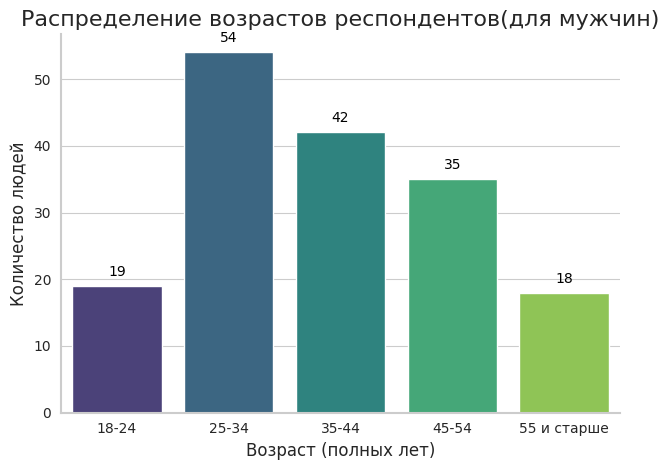

/tmp/ipykernel_100693/273196591.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")


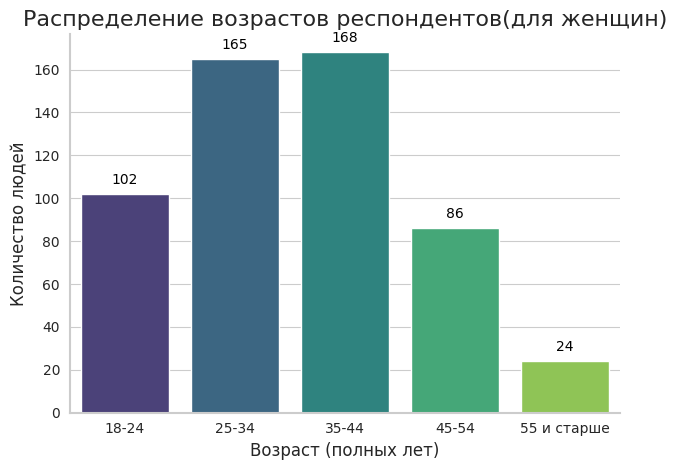

In [84]:

# Считаем количество по возрасту
age_counts = df[df['И в заключение несколько вопросов о вас. Укажите ваш пол. (Одиночный выбор)'] == "Мужской"]['Сколько вам полных лет? (Одиночный выбор)'].value_counts().sort_index()

# Строим график
barplot = sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")

# Красивые названия
plt.title('Распределение возрастов респондентов(для мужчин)', fontsize=16)
plt.xlabel('Возраст (полных лет)', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)

# Аннотации над столбцами
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')

barplot.spines['top'].set_visible(False)
barplot.spines['right'].set_visible(False)
barplot.spines['left'].set_linewidth(1.5)
barplot.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
plt.show()

# Считаем количество по возрасту
age_counts = df[df['И в заключение несколько вопросов о вас. Укажите ваш пол. (Одиночный выбор)'] == "Женский"]['Сколько вам полных лет? (Одиночный выбор)'].value_counts().sort_index()

# Строим график
barplot = sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")

# Красивые названия
plt.title('Распределение возрастов респондентов(для женщин)', fontsize=16)
plt.xlabel('Возраст (полных лет)', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)

# Аннотации над столбцами
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')

barplot.spines['top'].set_visible(False)
barplot.spines['right'].set_visible(False)
barplot.spines['left'].set_linewidth(1.5)
barplot.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
plt.show()

Заметим, что картина примерно одинаковая с точки зрения того, насколько меньше покупают мужчины в возрасте 35-44 года

Отсюда можно сделать вывод, что преобладают люди в возрасте от 25 до 44 лет

Если смотреть на картину в целом:

/tmp/ipykernel_100693/3179525843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")


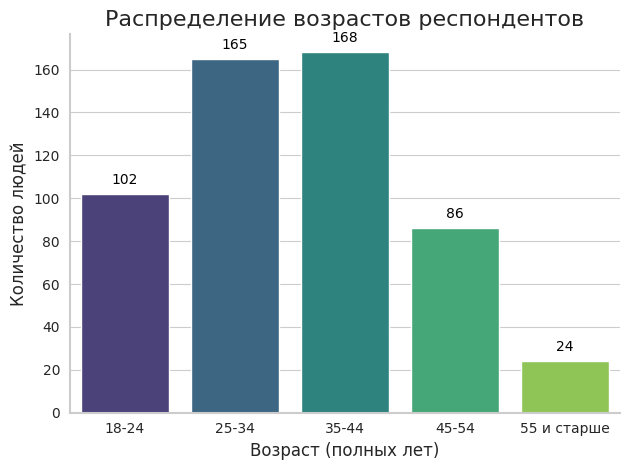

In [85]:



# Строим график
barplot = sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")

# Красивые названия
plt.title('Распределение возрастов респондентов', fontsize=16)
plt.xlabel('Возраст (полных лет)', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)

# Аннотации над столбцами
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')

barplot.spines['top'].set_visible(False)
barplot.spines['right'].set_visible(False)
barplot.spines['left'].set_linewidth(1.5)
barplot.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
plt.show()

Сделаем OHE по одинночному выбору

In [86]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore'), single_columns)
    ],
    remainder='passthrough'  # Оставляем остальные колонки без изменений
)

# Применяем преобразование
X_encoded = preprocessor.fit_transform(df)

encoded_df = pd.DataFrame(X_encoded)

# Восстанавливаем названия колонок (очень удобно!)
feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(single_columns)
all_features = list(feature_names) + [col for col in df.columns if col not in single_columns]
encoded_df.columns = all_features

encoded_df.head()

,"Где вы чаще всего совершаете покупки? (Одиночный выбор)_И онлайн, и офлайн",Где вы чаще всего совершаете покупки? (Одиночный выбор)_Чаще онлайн,Где вы чаще всего совершаете покупки? (Одиночный выбор)_Чаще офлайн,"Как часто вы совершаете покупки на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)_2-3 раза в месяц","Как часто вы совершаете покупки на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)_2-3 раза в неделю","Как часто вы совершаете покупки на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)_Каждый день","Как часто вы совершаете покупки на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)_Раз в месяц или реже","Как часто вы совершаете покупки на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)_Раз в неделю",На какой онлайн-площадке вы покупаете чаще всего? (Одиночный выбор)_AliExpress,На какой онлайн-площадке вы покупаете чаще всего? (Одиночный выбор)_Amazon,...,"Какие способы доставки для вас удобнее при покупках на онлайн-площадках (маркетплейсы, интернет-магазины и пр.)? (Множественный выбор)_Вариант ""другое""","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Долгая доставка","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Товар не соответствовал описанию или фото","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Плохое качество товара","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Пришёл не тот товар / не весь заказ","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Сложности с возвратом","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Поддержка не отвечала","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Ошибки при оплате","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Поврежденная упаковка или товар","Каких сервисов или функций вам не хватает при онлайн‑покупках, чтобы сделать их удобнее? (Свободный ответ)"
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Затрудняюсь ответить
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,Затрудняюсь ответить
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Затрудняюсь ответить
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,1,1,1,1,0,0,0,0,Затрудняюсь ответить
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,Затрудняюсь ответить


In [87]:
encoded_df.columns

Index(['Где вы чаще всего совершаете покупки? (Одиночный выбор)_И онлайн, и офлайн',
       'Где вы чаще всего совершаете покупки? (Одиночный выбор)_Чаще онлайн',
       'Где вы чаще всего совершаете покупки? (Одиночный выбор)_Чаще офлайн',
       'Как часто вы совершаете покупки на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)_2-3 раза в месяц',
       'Как часто вы совершаете покупки на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)_2-3 раза в неделю',
       'Как часто вы совершаете покупки на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)_Каждый день',
       'Как часто вы совершаете покупки на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)_Раз в месяц или реже',
       'Как часто вы совершаете покупки на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)_Раз в неделю',
       'На какой онлайн-площадке вы покупаете чаще всего? 

## Пора приступать к заданиям

Опишите аудиторию (пол, возраст, частота
покупок).

Посмотрим на распределение по полу

<Axes: xlabel='И в заключение несколько вопросов о вас. Укажите ваш пол. (Одиночный выбор)', ylabel='count'>

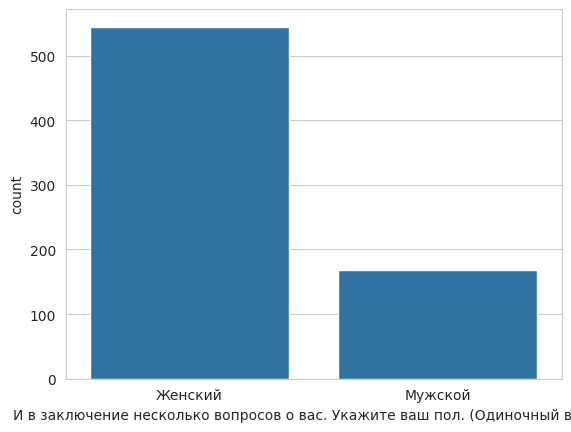

In [ ]:
sns.countplot(x=df['И в заключение несколько вопросов о вас. Укажите ваш пол. (Одиночный выбор)'])

Частота покупок может оцениваться как результат оттвета на вопрос "где чаще вы совершаете покупки". В таком случае:

<Axes: xlabel='Где вы чаще всего совершаете покупки? (Одиночный выбор)', ylabel='count'>

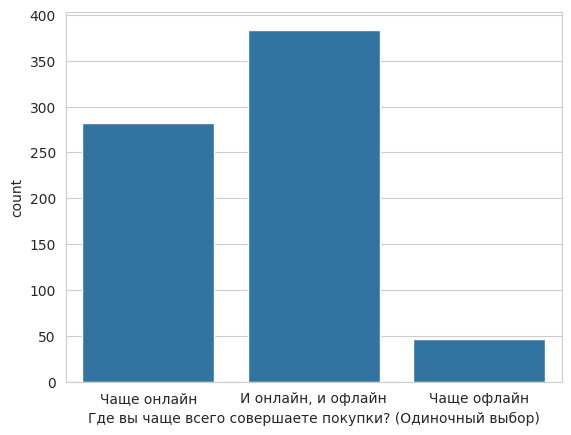

In [95]:
sns.countplot(x=df['Где вы чаще всего совершаете покупки? (Одиночный выбор)'])

Заметим, насколько превалируют покупки онлайн в таком случае

Однако, не стоит забывать, что скорее всего этот опрос как раз и был нацелен на тех, кто совершает покупки часто

Итого, в результате первичного исследования данных мы получили информацию об аудитории:

В основном женщины от 25 до 44 лет, которые регулярно покупают на маркетплейсах

Проанализируем открытые вопросы:


Так как в таблице идет автоматическая подстановка "Затрудняюсь ответить", отфильтруем только те записи, где пользователи оставили обратную связь


In [104]:
df_for_theme_investigation = df[df['Каких сервисов или функций вам не хватает при онлайн‑покупках, чтобы сделать их удобнее? (Свободный ответ)'] != 'Затрудняюсь ответить']
df_for_theme_investigation.head()

,ID ответа,Дата ответа,Где вы чаще всего совершаете покупки? (Одиночный выбор),"Как часто вы совершаете покупки на онлайн-площадках (маркетплейсы, интернет-магазины и прочее)? (Одиночный выбор)","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Wildberries","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Amazon","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_AliExpress","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Ozon","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_eBay","На каких онлайн-площадках (маркетплейсы, интернет-магазины и прочее) вы покупали когда-либо? (Множественный выбор)_Яндекс Маркет",...,"С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Товар не соответствовал описанию или фото","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Плохое качество товара","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Пришёл не тот товар / не весь заказ","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Сложности с возвратом","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Поддержка не отвечала","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Ошибки при оплате","С какими проблемами вы столкнулись при использовании онлайн-площадок (маркетплейсы, интернет-магазины и прочее)? (Множественный выбор)_Поврежденная упаковка или товар","Каких сервисов или функций вам не хватает при онлайн‑покупках, чтобы сделать их удобнее? (Свободный ответ)",И в заключение несколько вопросов о вас. Укажите ваш пол. (Одиночный выбор),Сколько вам полных лет? (Одиночный выбор)
5,117905518,2025-05-25 13:28:00,Чаще онлайн,Раз в месяц или реже,1,0,1,1,0,0,...,0,0,0,0,0,0,0,вы работаете очень плохо.,Мужской,55 и старше
6,117905087,2025-05-25 12:21:00,Чаще онлайн,Раз в месяц или реже,1,0,0,1,0,0,...,0,0,0,0,0,0,1,если товар вообще запрещен к ввозу в страну за...,Женский,55 и старше
7,117903682,2025-05-25 12:18:00,Чаще онлайн,Раз в неделю,1,0,0,1,0,0,...,0,0,0,0,0,0,0,все нормално,Мужской,25-34
9,117898414,2025-05-25 11:37:00,"И онлайн, и офлайн",Раз в месяц или реже,1,0,0,1,0,0,...,0,1,0,1,0,0,0,низкие цены,Женский,18-24
10,117892465,2025-05-25 11:06:00,Чаще онлайн,Раз в месяц или реже,1,0,1,0,0,0,...,0,0,0,0,0,0,0,Пока все устраивает,Мужской,55 и старше


Выясним точки роста при помощи тематического моделирования

Теперь сделаем кластеризацию

In [135]:

stop_words = stopwords.words('russian')

# 5 кластеров для топ 7 топкиов
n_clusters = 7

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stop_words)),
    ('kmeans', KMeans(n_clusters=10, random_state=42))
])

pipeline.fit(df_for_theme_investigation['Каких сервисов или функций вам не хватает при онлайн‑покупках, чтобы сделать их удобнее? (Свободный ответ)'])

vectorizer = pipeline.named_steps['vectorizer']
kmeans_model = pipeline.named_steps['kmeans']

def print_clusters(model, vectorizer, n_top_words):
    words = vectorizer.get_feature_names_out()
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    for idx in range(n_clusters):
        print(f"\nCluster {idx}:")
        print(" ".join([words[i] for i in order_centroids[idx, :n_top_words]]))

print_clusters(kmeans_model, vectorizer, n_top_words=20)


Cluster 0:
быстрая доставка качесто получении оплата короткий корзины коода контролировалось конкретно компенсауию количество кого клиенту классно китая кидаю качество качественный качестве

Cluster 1:
устраивает всё пока идеально лично порядка нормально данный момент корма карта корзины качестве качественный коода контролировалось конкретно качество количество качесто

Cluster 2:
хватает вроде всë оплаты заказа получении качестве описания полеого продавца вопросов сервисам функциям денег примерить возвратом платным потрогать конкретно пусть

Cluster 3:
товар пришел причина вообще плати тзаказ деньги отменилас пишут приходит качественный компенсауию брак возвратный посмотреть находится данный момент оплаты скидкой

Cluster 4:
фото косметики точное одежды хотела отслеживанпе отзывы реальных позиции видео увидеть подробно качество бренда которые реальные реальными добавить продавцы курьера

Cluster 5:
доставить вовремя отказывается продать пусть продавец сразу достали отсутствие накрутк

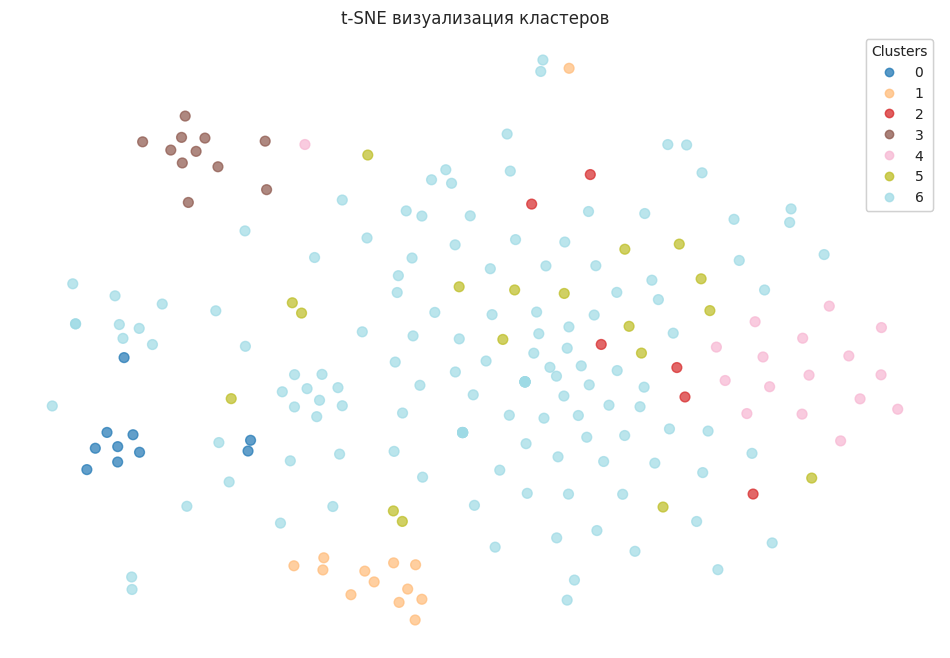

In [141]:

vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df_for_theme_investigation['Каких сервисов или функций вам не хватает при онлайн‑покупках, чтобы сделать их удобнее? (Свободный ответ)'])

# Cluster
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(X)

# t-SNE
tsne = TSNE(n_components=2, perplexity=10, random_state=42, init='random', learning_rate='auto')
X_tsne = tsne.fit_transform(X.toarray())

# Plotting DataFrame
df_plot = pd.DataFrame({
    'x': X_tsne[:, 0],
    'y': X_tsne[:, 1],
    'cluster': clusters
})

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x=df_plot['x'], y=df_plot['y'], c=df_plot['cluster'], cmap='tab20', alpha=0.7, s=50)
plt.title('t-SNE визуализация кластеров')
plt.axis('off')

# Legend
n_clusters = 7
handles, labels = scatter.legend_elements(prop="colors", num=n_clusters)
legend = plt.legend(handles, labels, title="Clusters")
plt.gca().add_artist(legend)

plt.show()

Заметим, что у нас большинство кластеров разрозненные, но выделяются 0, 1,3,4 кластеры. Посмотрим на них(т.к. это значит, что проблема не единичная и похожие отзыввы повторяются неоднократно)

In [144]:
# Добавим кластеры в исходный датафрейм
df_for_theme_investigation['cluster'] = clusters

# Показать по 3 случайных текста на кластер
for cluster in sorted(df_for_theme_investigation['cluster'].unique()):
    print(f"\nCluster {cluster}:")
    texts = df_for_theme_investigation[df_for_theme_investigation['cluster'] == cluster]['Каких сервисов или функций вам не хватает при онлайн‑покупках, чтобы сделать их удобнее? (Свободный ответ)'].sample(5, replace=True)
    for text in texts:
        print(" -", text[:])  


Cluster 0:
 - доставка
 - доставка
 - доставка
 - качесто и быстрая доставка
 - доставка

Cluster 1:
 - Всё порядка нормально
 - Всё хорошо
 - все устраивает
 - Всё хорошо
 - меня всё устраивает

Cluster 2:
 - — возможность оплачивать не сразу
 — видеть где конкретно товар (чтобы понимать проблемы с доставкой),
 — видеть причину отмена доставки товара продавцом,
 - — возможность оплачивать не сразу
 — видеть где конкретно товар (чтобы понимать проблемы с доставкой),
 — видеть причину отмена доставки товара продавцом,
 - вовремя доставить
 - вовремя доставить
 - хотелось бы чтоб продавец учитывал сроки и посылал во время.

Cluster 3:
 - всего хватает
 - все хватает
 - Не хватает оплаты при получении заказа.
 - всего хватает
 - Не хватает оплаты при получении заказа.

Cluster 4:
 - хотелось бы чтобы все те товары которые есть на сайте было реально купить. то есть заплатить и знать что товар точно привезут. а не ждать неделями и потом не получить.
 - когда товар приходит не качественный 

/tmp/ipykernel_100693/1350253431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_theme_investigation['cluster'] = clusters


0,1 кластеры с положительными отзывами

3 кластер - жалобы на то, что у респондентов нет денег

4 кластер - жалобы на качество доставки(а именно условия, баги системы, прозрачность и скорость)

В целом цель исследования была выполнена, давайте повеселимся и посмотрим на heatmap опроса

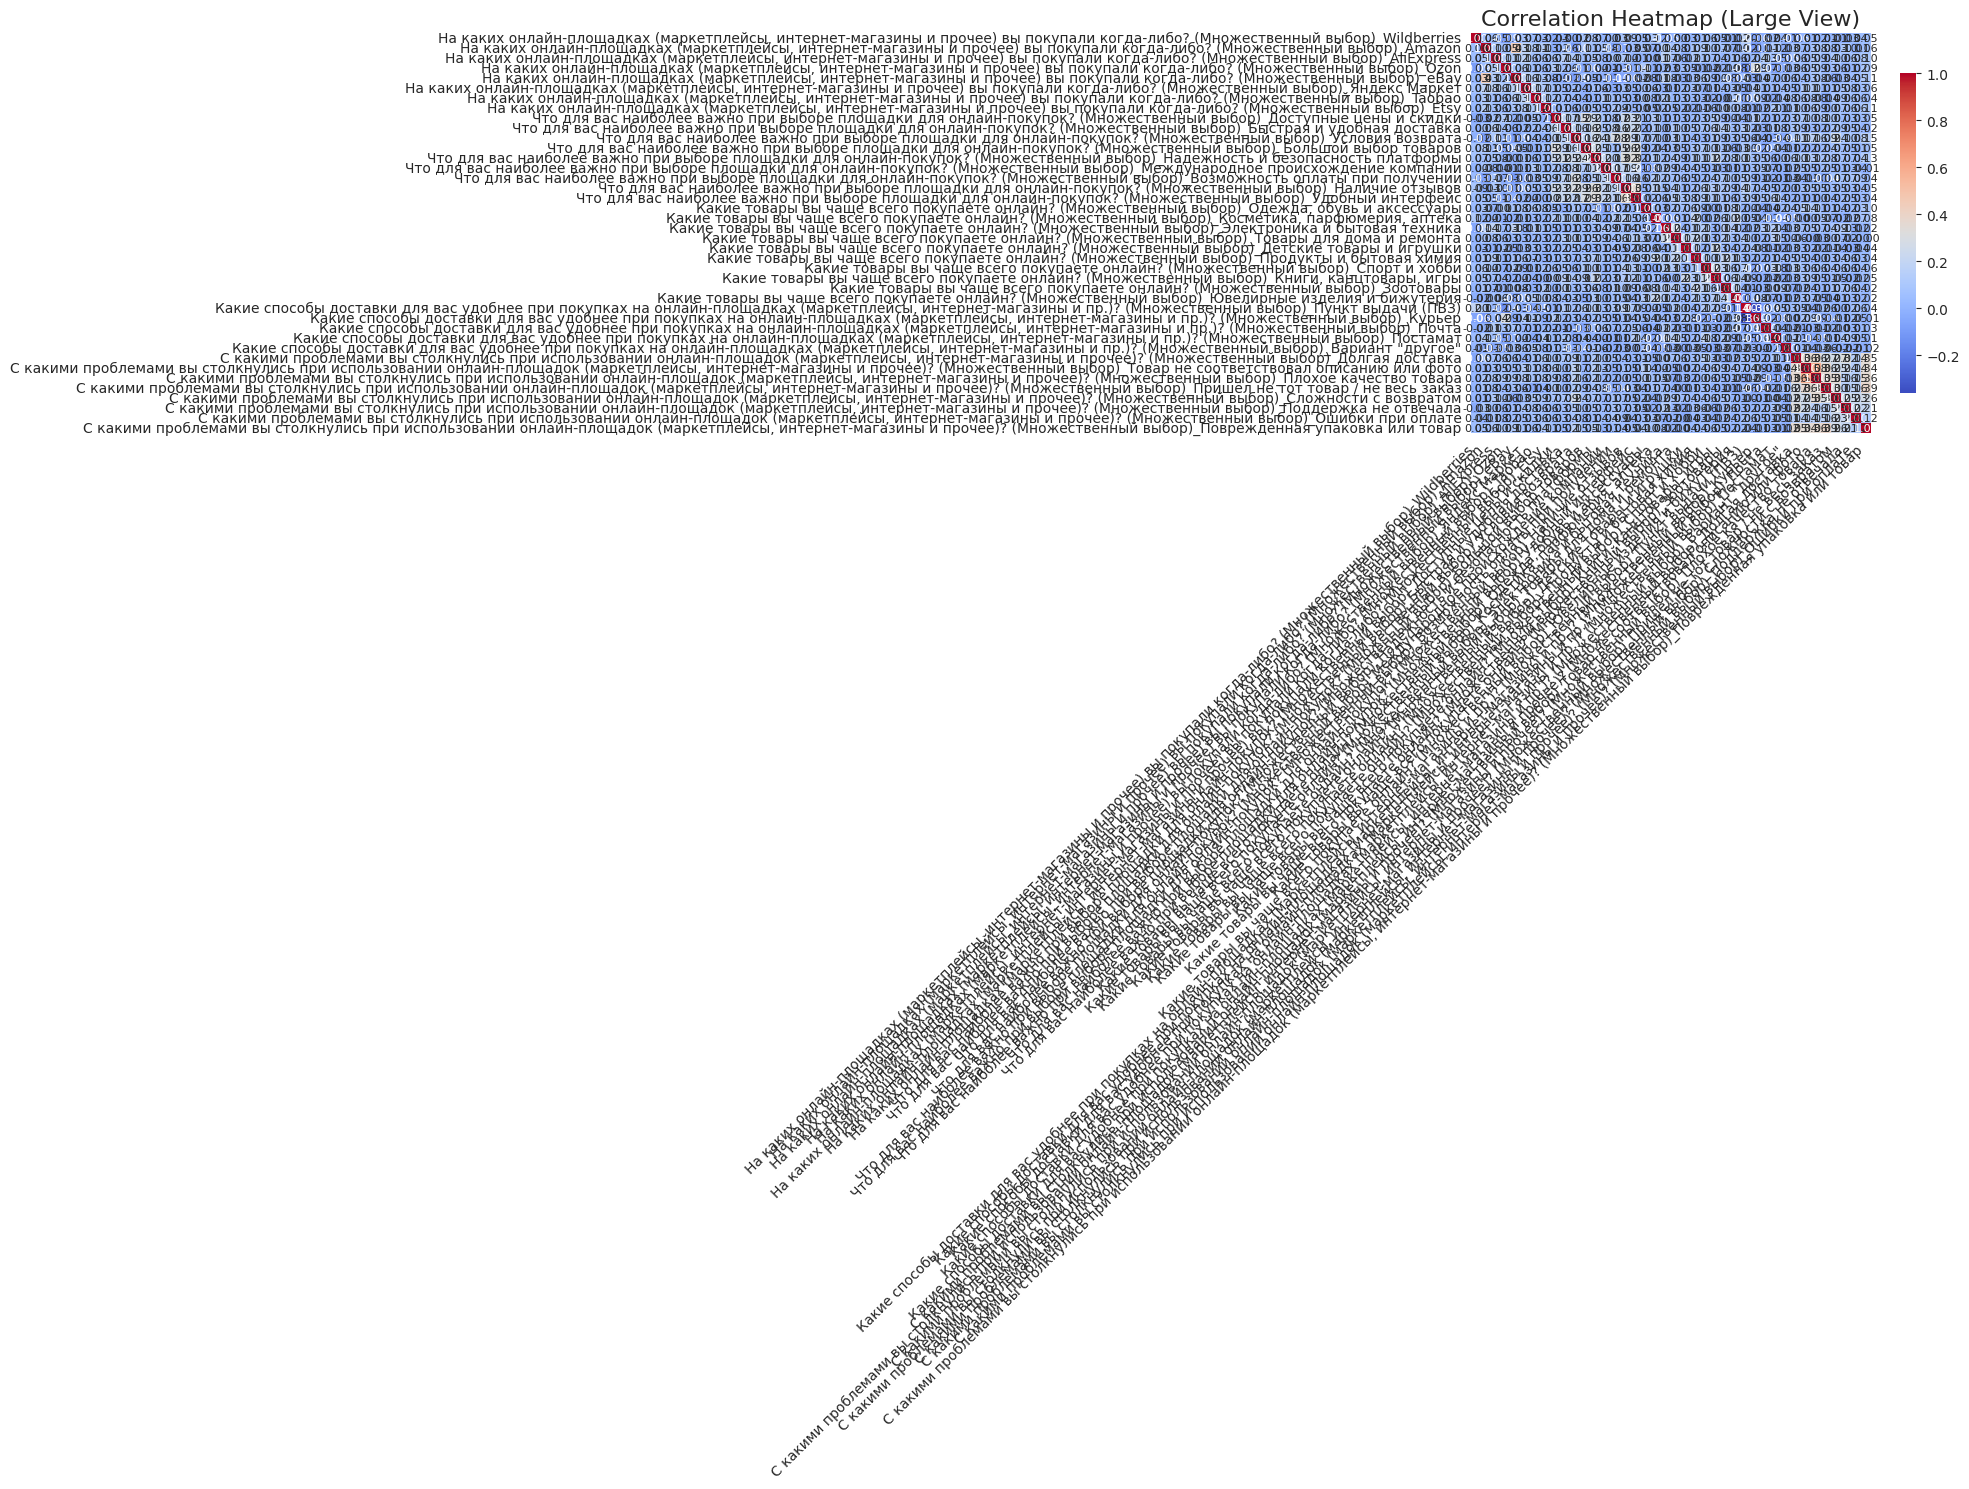

In [153]:
columns_for_drop = []
for i in df.columns:
    if i not in multiple_columns and i not in single_columns:
        columns_for_drop.append(i)

# Final list of columns to exclude
cols_to_exclude = columns_for_drop + ['Где вы чаще всего совершаете покупки? (Одиночный выбор)'] + single_columns
df_corr = df.drop(columns=cols_to_exclude).corr()

# Set up the matplotlib figure with a large size
plt.figure(figsize=(20, 15))  # Width x Height — adjust as needed

# Draw the heatmap
sns.heatmap(df_corr,
            annot=True,           # Show correlation values
            fmt=".2f",            # Format for numbers
            cmap='coolwarm',      # Color scheme
            square=True,          # Make cells square
            cbar_kws={"shrink": .8},  # Shrink color bar
            annot_kws={"size": 8})   # Smaller annotation font for readability

# Improve layout
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Correlation Heatmap (Large View)', fontsize=16)
plt.tight_layout()  # Prevent label cutoff

plt.show()

Наигрались